In [21]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter

# local imports
from prepare import *

In [27]:
compiled_train_data = joblib.load('compiled_train_data.pkl')
compiled_test_data = joblib.load('compiled_test_data.pkl')
train_labels = pd.read_csv('data/train_labels.csv')

In [28]:
compiled_train = pd.concat(compiled_train_data, axis=1).T

compiled_train.drop('installation_id_slice', axis=1, inplace=True)

compiled_test = pd.concat(compiled_test_data, axis=1).T

In [29]:
compiled_train

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,...,total_event_count,avg_event_count,avg_review_incorrect_feedback,avg_review_correct_feedback,total_rounds_beat,total_movies_skipped,total_movies_watched,total_elsewhere_clicks,total_help_button_clicks,total_play_again
647,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,36473,56.2855,313.143,4015.89,18,1,2,94,4,0
1143,f56e0afc,77b8ee947eb84b4e,2019-08-06 05:35:19.167000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,...,76743,67.083,1771.27,3103.88,23,1,2,156,4,0
1230,3bfd1a65,6bdf9623adc94d89,2019-08-06 05:37:50.020000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,80571,65.4517,1871.73,3103.88,23,1,2,160,4,0
2142,3bfd1a65,9501794defd84e4d,2019-08-06 20:34:53.812000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,134171,62.609,2427.52,2544.59,47,2,5,348,4,1
2569,f56e0afc,a9ef3ecb3d1acc6a,2019-08-06 20:49:59.095000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,...,159744,62.1572,2467.7,2309.92,58,2,5,387,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,5b49460a,460e8bdc2822b340,2019-07-30 12:12:49.516000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",ffc90c32,1,2000,0,Chest Sorter (Assessment),Assessment,...,120180,61.1914,669.875,2560.42,58,2,4,512,0,2
888,90d848e0,b05a02b52d5c1f4c,2019-08-07 01:06:38.407000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",ffd2871d,1,2000,0,Cauldron Filler (Assessment),Assessment,...,97262,109.406,4193.14,2401.61,32,0,1,250,3,1
932,90d848e0,dadd1a4d8ac68ab0,2019-09-09 15:34:41.704000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",ffeb0b1b,1,2000,0,Cauldron Filler (Assessment),Assessment,...,199920,214.277,814.765,3491.05,15,0,0,112,0,4
1358,3bfd1a65,a6885ab824fbc32c,2019-09-22 01:58:20.095000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",ffeb0b1b,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,232312,170.943,896.02,3382.82,25,0,0,148,0,6


In [24]:
compiled_train = pd.merge(compiled_train, train_labels[['installation_id','game_session','accuracy_group']], \
                  on=['installation_id','game_session'])
compiled_train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,...,avg_event_count,avg_review_incorrect_feedback,avg_review_correct_feedback,total_rounds_beat,total_movies_skipped,total_movies_watched,total_elsewhere_clicks,total_help_button_clicks,total_play_again,accuracy_group
0,3bfd1a65,901acc108f55a5a1,2019-08-06 05:22:01.344000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,56.2855,313.143,4015.89,18,1,2,94,4,0,3
1,f56e0afc,77b8ee947eb84b4e,2019-08-06 05:35:19.167000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,...,67.083,1771.27,3103.88,23,1,2,156,4,0,0
2,3bfd1a65,6bdf9623adc94d89,2019-08-06 05:37:50.020000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,65.4517,1871.73,3103.88,23,1,2,160,4,0,3
3,3bfd1a65,9501794defd84e4d,2019-08-06 20:34:53.812000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,...,62.609,2427.52,2544.59,47,2,5,348,4,1,2
4,f56e0afc,a9ef3ecb3d1acc6a,2019-08-06 20:49:59.095000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,...,62.1572,2467.7,2309.92,58,2,5,387,4,1,3


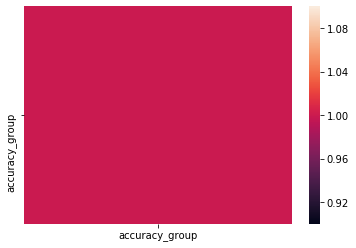

In [26]:
sns.heatmap(compiled_train.corr())